In [2]:
from tools._counttools import gen_necklace
from tools._graphtools import generate_rgc, generate_ft, rgc_coords, pl_graph, left_state, right_state,tree_mag, graph_from_fluxed,rgc_mat, convert_to_phase, shift_graph
from tools._vectools import J_n, B_l, neck_permute, permute_bipartite_adjacency,pad

import numpy as np
import random
import matplotlib.pyplot as plt

np.set_printoptions(precision=2,suppress=True,linewidth = np.inf)


In [3]:
X = [2]*2
d = len(X)
N = np.prod(X)
seed = 3
necklace = gen_necklace(N, random.seed(seed))

necklace2 = gen_necklace(N, random.seed(seed+1))

In [4]:
rgc = generate_rgc(generate_ft(X), necklace)
rgc.construct_adj()
rgc.construct_fluxed()

In [5]:
rgc2 = generate_rgc(generate_ft(X), necklace2)
rgc2.construct_adj()
rgc2.construct_fluxed()

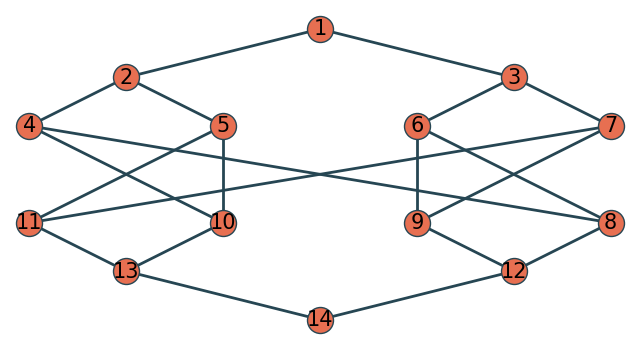

In [6]:
fig, axes = plt.subplots(1, 1, figsize=(8, 8))  # adjust figsize as needed
pl_graph(axes, rgc, positions=rgc_coords(X,xd=3,yd=1,spacing=1), vertex_size=350,outline_weight = 1, edge_weight=2,margin=.2,labels=True)
plt.show()

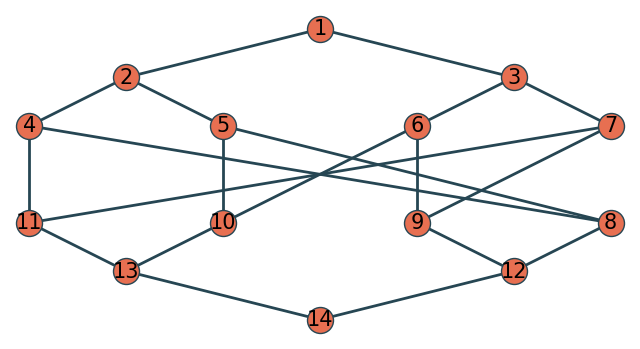

In [7]:
fig, axes = plt.subplots(1, 1, figsize=(8, 8))  # adjust figsize as needed
pl_graph(axes, rgc2, positions=rgc_coords(X,xd=3,yd=1,spacing=1), vertex_size=350,outline_weight = 1, edge_weight=2,margin=.2,labels=True)
plt.show()

In [8]:
def vec_plot(vec):
    labels = np.arange(1,len(vec)+1)

    plt.bar(labels,vec)
    plt.xlabel("Site")
    plt.show()

In [9]:
fluxes = np.linspace(0,8*np.pi,300)
mat_elem = []
mat_elem2 = []
for flux in fluxes:
    mat_elem.append(np.abs( left_state(rgc,flux).conj().T @ rgc.weighted_adj(flux) @ right_state(rgc,flux))**2)
    mat_elem2.append(np.abs( left_state(rgc2,flux).conj().T @ rgc2.weighted_adj(flux) @ right_state(rgc2,flux))**2)

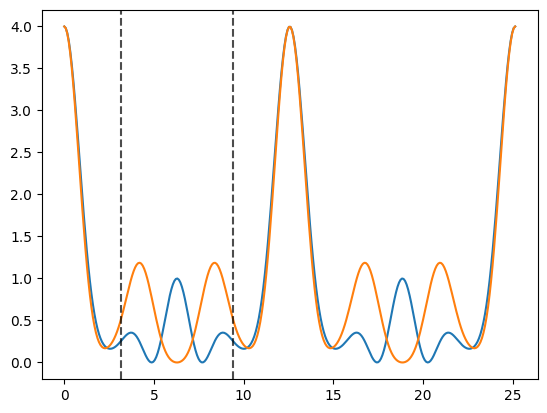

In [10]:
plt.plot(fluxes,mat_elem)
plt.plot(fluxes,mat_elem2)

plt.axvline(3*np.pi,color="black",alpha=.7,linestyle="--")
plt.axvline(np.pi,color="black",alpha=.7,linestyle="--")


In [11]:
def left_state_analytic(flux, L):
    state = np.zeros(L,dtype=complex)

    for l in range(L):
        state[l] = 1/np.sqrt(L) * np.exp(1j* (flux/4*(1-L) + flux/2*l))
        #state[l] = 1/np.sqrt(L) * np.exp(1j* (flux/4 * l))

    return state


In [12]:
X = [2]*2
d = len(X)
L = np.prod(X)
seed = 3
necklace = gen_necklace(L, random.seed(seed))

rgc = generate_rgc(generate_ft(X), necklace)
rgc.construct_adj()
rgc.construct_fluxed()

In [13]:
rgc = generate_rgc(generate_ft(X), necklace)
rgc.construct_adj()
rgc.construct_fluxed()

#flux = 1.79516
flux = .2


state =np.array( [x for x in left_state(rgc,flux) if x != 0] )
print("Andrew: ", state)
print("Angles: ",np.angle(state))
print("Spacing: ", np.angle(state)[0] - np.angle(state)[1])
print("Offset: ", np.angle(state)[0])


analytic_state=left_state_analytic(flux, L)
print("Analytic Attempt: ", analytic_state)
print("Angles: ",np.angle(analytic_state))
print("Spacing: ", np.angle(analytic_state)[0] - np.angle(analytic_state)[1])
print("Offset: ", np.angle(analytic_state)[0])

Andrew:  [0.49-0.07j 0.5 -0.02j 0.5 +0.02j 0.49+0.07j]
Angles:  [-0.15 -0.05  0.05  0.15]
Spacing:  -0.1
Offset:  -0.15000000000000002
Analytic Attempt:  [0.49-0.07j 0.5 -0.02j 0.5 +0.02j 0.49+0.07j]
Angles:  [-0.15 -0.05  0.05  0.15]
Spacing:  -0.1
Offset:  -0.15000000000000002


# Checking the Action of Glue Graph

In [14]:
from tools._vectools import permute_bipartite_adjacency, e_n

def slowdown(phi, B):
    leaves = int(np.shape(B)[0])
    total = 0
    for i in range(0,leaves):
        for j in range(0,leaves):
            total += np.exp((-1j*phi*(i+j)/2)) * (B)[i,j]
    return total/leaves * np.exp(1j *phi/2 * (leaves-1))

def formula_check(phi, leaves):
    ### For default cycle
    total = sum (np.exp(1j*phi* ((-l%leaves)- l )/2) + np.exp(1j*phi* ( (leaves-1-l)%leaves -l ) /2) for l in range(leaves))
    return total/leaves 

Text(0.5, 1.0, 'Default Necklace')

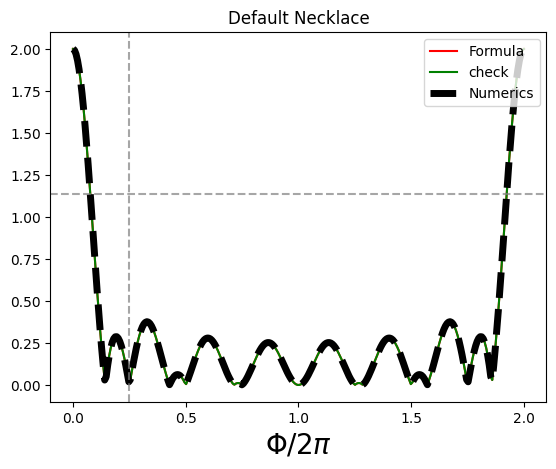

In [15]:
X = [2]*3
d = len(X)
L = np.prod(X)
necklace = [x for x in range(1, 2*L+1)]
rgc3 = generate_rgc(generate_ft(X), necklace)
rgc3.construct_adj()
rgc3.construct_fluxed()

fluxes = np.linspace(0,4*np.pi,300)
mat_elem = []
mat_elem2 = []
for flux in fluxes:
    mat_elem.append(np.abs(left_state(rgc3,flux).conj().T @ rgc3.weighted_adj(0) @ right_state(rgc3,flux)))

fs=20
plt.xticks(
        np.linspace(0, 4*np.pi, 5),
        np.linspace(0,       2, 5))
plt.xlabel(r"$\Phi/2 \pi$",fontsize=fs)

plt.plot(fluxes, np.abs(slowdown(fluxes, B_l(L))) ,color="red",label="Formula")

plt.plot(fluxes, np.abs(formula_check(fluxes, L)) ,color="green",label="check")

plt.plot(fluxes,mat_elem,color="black",alpha = 1, linestyle="--", lw=5,label="Numerics")

plt.legend(fontsize=10, loc="upper right")

plt.axhline(1.138,color="grey",alpha=.7,linestyle="--")
plt.axvline(np.pi/2,color="grey",alpha=.7,linestyle="--")

plt.title("Default Necklace")

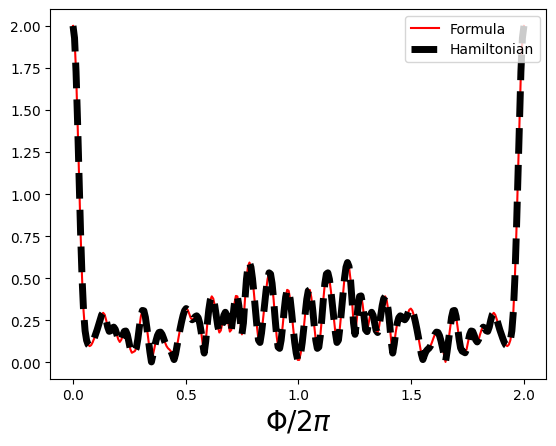

In [16]:
X = [2]*5
d = len(X)
L = np.prod(X)
#necklace = [x for x in range(1, 2*L+1)]
necklace = gen_necklace(L) # [x for x in range(1, 2*L+1)]
o,e = neck_permute(necklace)

bip =permute_bipartite_adjacency(B_l(L), o,e)[0:L,L:2*L]

rgc3 = graph_from_fluxed(rgc_mat(X,necklace))
rgc3.construct_adj()
rgc3.construct_fluxed()

fluxes = np.linspace(0,4*np.pi,300)
mat_elem = []
mat_elem2 = []
for flux in fluxes:
    mat_elem.append(np.abs(left_state(rgc3,flux).conj().T @ rgc3.weighted_adj(0) @ right_state(rgc3,flux)))
fs=20
plt.xticks(
        np.linspace(0, 4*np.pi, 5),
        np.linspace(0,       2, 5))
plt.xlabel(r"$\Phi/2 \pi$",fontsize=fs)

plt.plot(fluxes, np.abs(slowdown(fluxes,bip)) ,color="red",label="Formula")
plt.plot(fluxes,mat_elem,color="black",alpha = 1, linestyle="--", lw=5,label="Hamiltonian")


plt.legend(fontsize=10, loc="upper right")



In [17]:
from tools._counttools import enumerate_necklaces_tqdm



# Average over Necklaces

In [18]:
X = [5]
d = len(X)
L = np.prod(X)
b = B_l(L)
necklaces = enumerate_necklaces_tqdm(int(L))
len(necklaces)

100%|██████████| 2880/2880 [00:00<00:00, 240461.74it/s]


1440

In [19]:
fluxes = np.linspace(0,4*np.pi,100)
abs_sum_support = np.zeros_like(fluxes)
comp_sum_support = np.zeros_like(fluxes,dtype="complex128")


for neck in necklaces:
    o, e = neck_permute(neck)
    B = o @ b @ e.T
    # compute the support vector for this neck
    curr_abs = np.array([abs(slowdown(phi, B)) for phi in fluxes])
    curr_comp = np.array([slowdown(phi, B) for phi in fluxes])
    abs_sum_support += curr_abs
    comp_sum_support += curr_comp


abs_avg_support = abs_sum_support / len(necklaces)
comp_avg_support = comp_sum_support / len(necklaces)

In [23]:
def cov(phi,L):
    total = 0
    omega = np.exp(1j*phi/2)
    for m in range (0,L):
        for l in range(0,m):
            for j in range(0,L):
                for k in range(0,L):
                    total += omega**(l+j-m-k)
    #return 2*total *( (2*L)/(L**2)* (2*L-1)/(L**2-1) - 4/L**2)
    return 2*total * (4/L**2 - 4/L**2)
    
def bound(L,phi):
    mu = 2/(L**2) * np.sin(phi*L/4)**2 / (np.sin(phi/4)**2)
    var = 2*L + 2/(L-1)* (np.sin(phi*L/4)**2 / (np.sin(phi/4)**2) - L) - (4/L)*np.sin(phi*L/4)**2 / (np.sin(phi/4)**2)
    # Covariance term accounting for phase cancellation
    term =  cov(phi,L) 
    return mu + (1/L) *np.sqrt(var  + term)
    

In [24]:
cov(np.pi,4)

np.complex128(0j)

/var/folders/n7/sdrzr_l16mqf79r9kr85jqd80000gn/T/ipykernel_52962/2077276779.py:13: RuntimeWarning: invalid value encountered in divide
  mu = 2/(L**2) * np.sin(phi*L/4)**2 / (np.sin(phi/4)**2)
/var/folders/n7/sdrzr_l16mqf79r9kr85jqd80000gn/T/ipykernel_52962/2077276779.py:14: RuntimeWarning: invalid value encountered in divide
  var = 2*L + 2/(L-1)* (np.sin(phi*L/4)**2 / (np.sin(phi/4)**2) - L) - (4/L)*np.sin(phi*L/4)**2 / (np.sin(phi/4)**2)
/Users/ciro/Desktop/RandomCycles/.RCenv/lib/python3.13/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/ciro/Desktop/RandomCycles/.RCenv/lib/python3.13/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/var/folders/n7/sdrzr_l16mqf79r9kr85jqd80000gn/T/ipykernel_52962/2077276779.py:13: RuntimeWarning: invalid value encountered in divide
  mu = 2/(L**2) * np.s

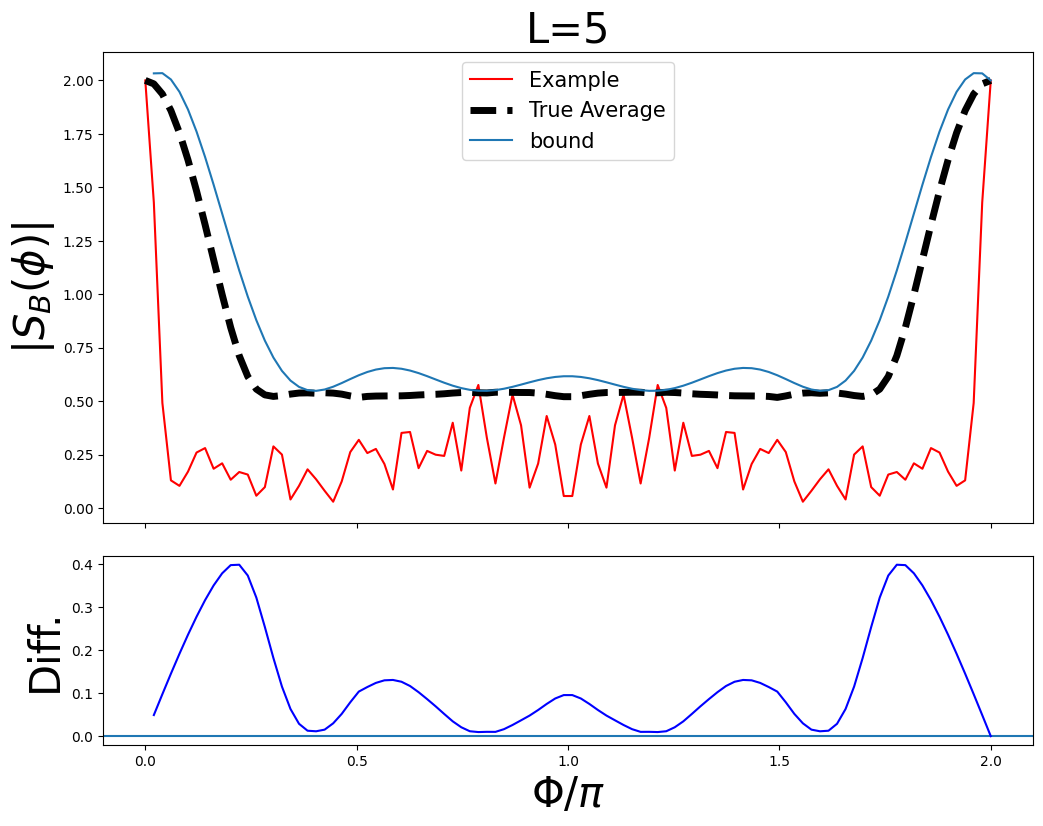

In [34]:
fs = 30

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 9), height_ratios=[2.5, 1])
plt.subplots_adjust(hspace=0.1)  # Reduce vertical space between plots

# --- Top plot: Original ---
ax1.plot(fluxes, np.abs(slowdown(fluxes, bip)), color="red", label="Example")
ax1.plot(fluxes, abs_avg_support, color="black", alpha=1, linestyle="--", lw=5, label="True Average")
ax1.plot(fluxes, bound(L, fluxes), label="bound")
ax1.set_title("L=%d" % L,fontsize=fs)
ax1.set_ylabel(r"$|S_{B}(\phi)|$",fontsize=fs)
ax1.legend(fontsize=15, loc="upper center")

# Format x-ticks and label (on bottom axis only)
ax2.set_xticks(np.linspace(0, 4*np.pi, 5))
ax2.set_xticklabels(np.linspace(0, 2, 5))
ax2.set_xlabel(r"$\Phi/ \pi$", fontsize=fs)

# --- Bottom plot: Difference ---
difference = bound(L, fluxes)-abs_avg_support 
ax2.axhline(0)
ax2.plot(fluxes, difference, color="blue")
ax2.set_ylabel("Diff.", fontsize=fs)

plt.savefig("bound.pdf")

In [152]:
X = [2]*2
d = len(X)
L = np.prod(X)
b = B_l(L)
necklaces = enumerate_necklaces_tqdm(int(L))

for neck in necklaces:
    o, e = neck_permute(neck)
    bip = o @ b @ e.T
    # compute the support vector for this neck
    if not np.isclose(sum(sum(bip))/np.prod(np.shape(bip)) * L,2):
        print("stupid")

100%|██████████| 144/144 [00:00<00:00, 240055.55it/s]


In [159]:
import numpy as np
from itertools import permutations, combinations

def generate_B_matrix(L):
    """
    Generates all possible B matrices for a given L, representing the adjacency
    between odd and even vertices in the binary necklace.
    """
    perms_even = permutations(range(L))
    perms_odd = permutations(range(L))
    B_matrices = []
    
    for p_even in perms_even:
        for p_odd in perms_odd:
            B = np.zeros((L, L))
            for i in range(L):
                # Each odd site connects exactly two even sites in cyclic order
                B[p_odd[i], p_even[i]] = 1
                B[p_odd[i], p_even[i-1]] = 1
            B_matrices.append(B)
    return B_matrices

def compute_probability(L, l, j, m, k):
    """
    Computes the probability p_{(l,j),(m,k)} numerically by counting the number
    of occurrences where both B[l,j] and B[m,k] are equal to 1.
    """
    B_matrices = generate_B_matrix(L)
    count = sum(B[l, j] == 1 and B[m, k] == 1 for B in B_matrices)
    total = len(B_matrices)
    return count / total

L = 4  # Specific case L = 4
probabilities = np.zeros((L, L, L, L))

# Compute all probabilities explicitly
for l in range(L):
    for j in range(L):
        for m in range(L):
            for k in range(L):
                if l != m:
                    probabilities[l, j, m, k] = compute_probability(L, l, j, m, k)

# Checking the maximum probability
max_probability = np.max(probabilities)
max_probability


np.float64(0.3333333333333333)

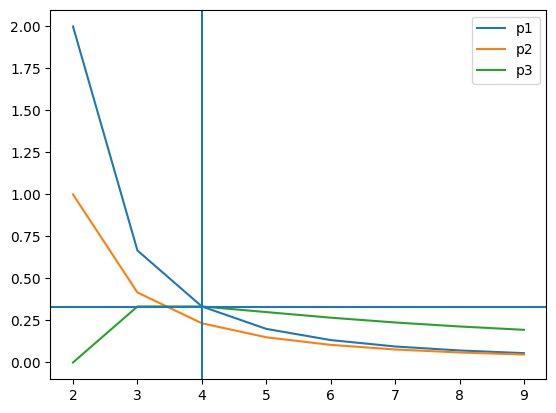

In [212]:
ls = np.array(list(range(2,10)))

plt.plot(ls, (4)/(ls*(ls-1)),label="p1")
plt.plot(ls, (2*ls)/(ls**2)* (2*ls-1)/(ls**2-1),label="p2")
plt.plot(ls, (2)/(ls)* (ls-2)/(ls-1),label="p3")

plt.axhline(0.33)
plt.axvline(4)

plt.legend()

In [106]:
ls

range(2, 10)

In [207]:
import numpy as np
import itertools

def generate_unique_B_matrices(L):
    """
    Return the list of all distinct 'necklace' B matrices for given L,
    where each row and each column have exactly two 1's.  For L=4, there are 72.
    """
    # Default cyclic B0: row ℓ connects to columns ℓ and (ℓ−1 mod L).
    B0 = np.zeros((L, L), dtype=int)
    for l in range(L):
        B0[l, l] = 1
        B0[l, (l - 1) % L] = 1

    seen = set()
    B_list = []
    for perm_rows in itertools.permutations(range(L)):
        for perm_cols in itertools.permutations(range(L)):
            B_perm = B0[np.array(perm_rows), :][:, np.array(perm_cols)]
            tup = tuple(map(tuple, B_perm))
            if tup not in seen:
                seen.add(tup)
                B_list.append(B_perm.copy())
    return B_list

# 1) Build and store all 72 matrices for L=4
L = 4
B_list = generate_unique_B_matrices(L)
assert len(B_list) == 72

# 2) Compute the joint probability array p[ℓ,j,p_idx,q] = Pr[B_{ℓ,j}=1 AND B_{p_idx,q}=1].
N = len(B_list)
p = np.zeros((L, L, L, L), dtype=float)
for ell in range(L):
    for j in range(L):
        for p_idx in range(L):
            for q in range(L):
                count = sum(1 for B in B_list if (B[ell, j] == 1 and B[p_idx, q] == 1))
                p[ell, j, p_idx, q] = count / N

# Pick φ near the violation (~3.09423)
phi = 3.094231960319595
omega = np.exp(1j * phi / 2)

# --- (A) Empirical variance Var_enum = E[|X_B|^2] − |E[X_B]|^2 by enumeration. ---
X_values = []
for B in B_list:
    xB = 0+0j
    for ell in range(L):
        for m_idx in range(L):
            xB += omega**(ell + m_idx) * B[ell, m_idx]
    X_values.append(xB)
X_values = np.array(X_values)

E_X_emp = np.mean(X_values)
Var_enum = np.mean(np.abs(X_values)**2) - np.abs(E_X_emp)**2

# --- (B) “Correct analytic” variance using E[ X_B · overline{X_B} ] − |E[X_B]|^2. ---
# First compute E[|X_B|^2] = sum_{ℓ,m,p_idx,q} [ω^(ℓ+m) · conj(ω^(p_idx+q))] · p[ℓ,m,p_idx,q].
E_X2 = 0+0j
for ell in range(L):
    for m_idx in range(L):
        for p_idx in range(L):
            for q in range(L):
                E_X2 += (
                    omega**(ell + m_idx)
                    * np.conjugate(omega**(p_idx + q))
                    * p[ell, m_idx, p_idx, q]
                )

# Next compute E[X_B] from the marginal distribution: E[B_{ℓ,m}] = 2/L.
# So E[X_B] = sum_{ℓ,m} ω^(ℓ+m) · (2/L) = (2/L) · (sum_ℓ ω^ℓ)(sum_m ω^m).
E_X_from_prob = (2.0/L) * (np.sum(omega**np.arange(L)))**2

Var_analytic_correct = E_X2 - np.abs(E_X_from_prob)**2

# --- (C) “Paper’s formula” for Var(X_B), i.e. Σ Var(x_ℓ) + 2 Σ_{ℓ<m} Σ_{j,k} ω^(ℓ+j+m+k)·(p − (2/L)^2). ---

# Step (C1): Compute Var(x_ℓ) exactly via Var(x_ℓ) = E[|x_ℓ|^2] − |E[x_ℓ]|^2,
# where x_ℓ = Σ_m ω^(ℓ+m) B_{ℓ,m}.  We do this directly from p[ℓ,j,ℓ,k].
Var_x = np.zeros(L, dtype=float)
E_x = np.zeros(L, dtype=complex)

for ell in range(L):
    # E[x_ℓ] = Σ_m ω^(ℓ+m)·Pr[B_{ℓ,m}=1] = Σ_m ω^(ℓ+m)·(2/L).
    E_x[ell] = (2.0/L) * np.sum(omega**(ell + np.arange(L)))

    # E[|x_ℓ|^2] = Σ_{j,k} [ ω^(ℓ+j)·conj(ω^(ℓ+k)) ] · Pr[B_{ℓ,j}=B_{ℓ,k}=1]
    Ex2 = 0+0j
    for j in range(L):
        for k in range(L):
            Ex2 += (omega**(ell + j)) * np.conjugate(omega**(ell + k)) * p[ell, j, ell, k]
    Var_x[ell] = (Ex2 - np.abs(E_x[ell])**2).real

# Step (C2): Compute the off‐diagonal “covariance” part from the paper, i.e.
#    2 * sum_{0<=ℓ<m<L} sum_{j,k} ω^(ℓ+j+m+k) [ p[ℓ,j,m,k] - (2/L)^2 ].
Cov_sum = 0+0j
for ell in range(L):
    for m_idx in range(ell + 1, L):
        for j in range(L):
            for k in range(L):
                Cov_sum += omega**(ell + j + m_idx + k) * (p[ell, j, m_idx, k] - 4.0 / (L**2))
Cov_paper = 2 * Cov_sum

Var_paper = np.sum(Var_x) + Cov_paper.real

# --- Finally, print all three numbers side by side: ---
print("Empirical Var(X_B)        = %0.12f" % Var_enum)
print("“Correct analytic” Var(X_B)= %0.12f" % Var_analytic_correct.real)
print("Paper’s Var(X_B)           = %0.12f" % Var_paper)


Empirical Var(X_B)        = 7.107030422048
“Correct analytic” Var(X_B)= 7.107030422048
Paper’s Var(X_B)           = 5.330758090076


In [208]:
p

array([[[[0.5 , 0.17, 0.17, 0.17],
         [0.17, 0.28, 0.28, 0.28],
         [0.17, 0.28, 0.28, 0.28],
         [0.17, 0.28, 0.28, 0.28]],

        [[0.17, 0.5 , 0.17, 0.17],
         [0.28, 0.17, 0.28, 0.28],
         [0.28, 0.17, 0.28, 0.28],
         [0.28, 0.17, 0.28, 0.28]],

        [[0.17, 0.17, 0.5 , 0.17],
         [0.28, 0.28, 0.17, 0.28],
         [0.28, 0.28, 0.17, 0.28],
         [0.28, 0.28, 0.17, 0.28]],

        [[0.17, 0.17, 0.17, 0.5 ],
         [0.28, 0.28, 0.28, 0.17],
         [0.28, 0.28, 0.28, 0.17],
         [0.28, 0.28, 0.28, 0.17]]],


       [[[0.17, 0.28, 0.28, 0.28],
         [0.5 , 0.17, 0.17, 0.17],
         [0.17, 0.28, 0.28, 0.28],
         [0.17, 0.28, 0.28, 0.28]],

        [[0.28, 0.17, 0.28, 0.28],
         [0.17, 0.5 , 0.17, 0.17],
         [0.28, 0.17, 0.28, 0.28],
         [0.28, 0.17, 0.28, 0.28]],

        [[0.28, 0.28, 0.17, 0.28],
         [0.17, 0.17, 0.5 , 0.17],
         [0.28, 0.28, 0.17, 0.28],
         [0.28, 0.28, 0.17, 0.28]],

    

In [185]:
def compute_joint_probabilities(L):
    B_list = generate_unique_B_matrices(L)
    N = len(B_list)
    p = np.zeros((L, L, L, L), dtype=float)
    for ell in range(L):
        for j in range(L):
            for p_idx in range(L):
                for q in range(L):
                    count = sum(1 for B in B_list if (B[ell, j] == 1 and B[p_idx, q] == 1))
                    p[ell, j, p_idx, q] = count / N
    return p, B_list

# Compute mu(phi) and Var(X_B) based on joint probabilities

def bound_correct(L, phi, p):
    """
    Compute the corrected bound on E[|S_B(phi)|]:
        mu(phi)   = (2 / L^2) * [ sin^2(L*phi/4) / sin^2(phi/4) ],
        Var(X_B)  = E[|X_B|^2] - |E[X_B]|^2 computed via p array.
    Then:
        bound_correct = mu(phi) + (1 / L) * sqrt(Var(X_B)).
    """
    omega = np.exp(1j * phi / 2)
    # Compute A for mu
    sin_phi_4 = np.sin(phi / 4)
    if np.abs(sin_phi_4) > 1e-12:
        A = (np.sin(L * phi / 4)**2) / (sin_phi_4**2)
    else:
        A = L**2
    mu = (2 / (L**2)) * A

    # Compute E[X_B] = (2/L)*(sum_{ell=0..L-1} omega^ell)^2
    sum_omega = np.sum(omega**np.arange(L))
    E_X = (2.0 / L) * (sum_omega**2)

    # Compute E[|X_B|^2] = sum_{ell,m,p,q} [omega^(ell+m) * conj(omega^(p+q))] * p[ell,m,p,q]
    E_X2 = 0+0j
    for ell in range(L):
        for m_idx in range(L):
            for p_idx in range(L):
                for q in range(L):
                    E_X2 += (omega**(ell + m_idx) * np.conjugate(omega**(p_idx + q)) * p[ell, m_idx, p_idx, q])

    Var_X = E_X2 - np.abs(E_X)**2
    var_real = np.real(Var_X)

    return mu + (1 / L) * np.sqrt(max(var_real, 0))

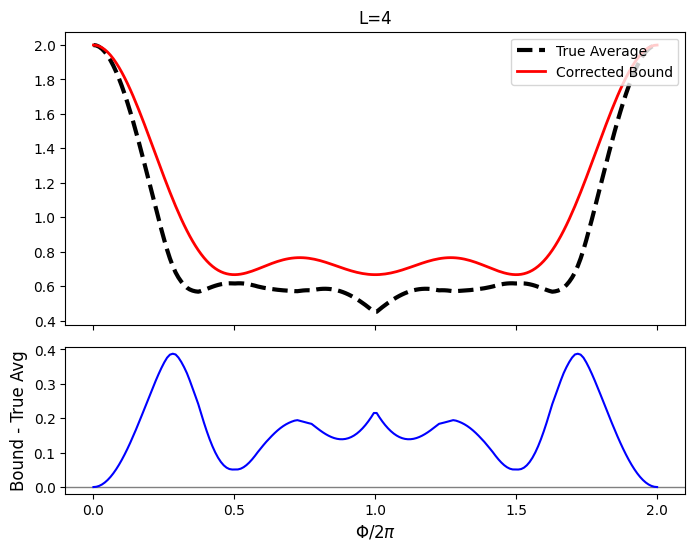

In [186]:
import numpy as np
import itertools

def generate_unique_B_matrices(L):
    """
    Return the list of all distinct 'necklace' B matrices for given L,
    where each row and each column have exactly two 1's.
    """
    B0 = np.zeros((L, L), dtype=int)
    for l in range(L):
        B0[l, l] = 1
        B0[l, (l - 1) % L] = 1

    seen = set()
    B_list = []
    for perm_rows in itertools.permutations(range(L)):
        for perm_cols in itertools.permutations(range(L)):
            B_perm = B0[np.array(perm_rows), :][:, np.array(perm_cols)]
            tup = tuple(map(tuple, B_perm))
            if tup not in seen:
                seen.add(tup)
                B_list.append(B_perm.copy())
    return B_list

# 1) Build and store all matrices for a given L
def compute_joint_probabilities(L):
    B_list = generate_unique_B_matrices(L)
    N = len(B_list)
    p = np.zeros((L, L, L, L), dtype=float)
    for ell in range(L):
        for j in range(L):
            for p_idx in range(L):
                for q in range(L):
                    count = sum(1 for B in B_list if (B[ell, j] == 1 and B[p_idx, q] == 1))
                    p[ell, j, p_idx, q] = count / N
    return p, B_list

# Compute mu(phi) and Var(X_B) based on joint probabilities

def bound_correct(L, phi, p):
    """
    Compute the corrected bound on E[|S_B(phi)|]:
        mu(phi)   = (2 / L^2) * [ sin^2(L*phi/4) / sin^2(phi/4) ],
        Var(X_B)  = E[|X_B|^2] - |E[X_B]|^2 computed via p array.
    Then:
        bound_correct = mu(phi) + (1 / L) * sqrt(Var(X_B)).
    """
    omega = np.exp(1j * phi / 2)
    # Compute A for mu
    sin_phi_4 = np.sin(phi / 4)
    if np.abs(sin_phi_4) > 1e-12:
        A = (np.sin(L * phi / 4)**2) / (sin_phi_4**2)
    else:
        A = L**2
    mu = (2 / (L**2)) * A

    # Compute E[X_B] = (2/L)*(sum_{ell=0..L-1} omega^ell)^2
    sum_omega = np.sum(omega**np.arange(L))
    E_X = (2.0 / L) * (sum_omega**2)

    # Compute E[|X_B|^2] = sum_{ell,m,p,q} [omega^(ell+m) * conj(omega^(p+q))] * p[ell,m,p,q]
    E_X2 = 0+0j
    for ell in range(L):
        for m_idx in range(L):
            for p_idx in range(L):
                for q in range(L):
                    E_X2 += (omega**(ell + m_idx) * np.conjugate(omega**(p_idx + q)) * p[ell, m_idx, p_idx, q])

    Var_X = E_X2 - np.abs(E_X)**2
    var_real = np.real(Var_X)

    return mu + (1 / L) * np.sqrt(max(var_real, 0))

# Example usage: plot true average vs corrected bound for L=4
if __name__ == "__main__":
    import matplotlib.pyplot as plt
    L = 4
    p, B_list = compute_joint_probabilities(L)
    fluxes = np.linspace(0, 4 * np.pi, 200)

    # Compute abs_avg_support
    abs_sum_support = np.zeros_like(fluxes)
    for B in B_list:
        for idx, phi in enumerate(fluxes):
            # S_B(phi) = (1/L) * sum_{i,j} exp(-i*phi*(i+j)/2) * B[i,j] * exp(i*phi/2*(L-1))
            omega = np.exp(-1j * phi / 2)
            total = 0+0j
            for i in range(L):
                for j in range(L):
                    total += omega**(i + j) * B[i, j]
            S_B = (total / L) * np.exp(1j * phi * (L - 1) / 2)
            abs_sum_support[idx] += np.abs(S_B)
    abs_avg_support = abs_sum_support / len(B_list)

    # Compute corrected bound values
    bound_vals = np.array([bound_correct(L, phi, p) for phi in fluxes])

    # Plot
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 6),
                                   gridspec_kw={'height_ratios': [2, 1]})
    plt.subplots_adjust(hspace=0.1)

    ax1.plot(fluxes, abs_avg_support, color="black", linestyle="--", lw=3, label="True Average")
    ax1.plot(fluxes, bound_vals, color="red", lw=2, label="Corrected Bound")
    ax1.set_title(f"L={L}")
    ax1.legend(fontsize=10, loc="upper right")

    ax2.axhline(0, color="gray", linewidth=1)
    ax2.plot(fluxes, bound_vals - abs_avg_support, color="blue")
    ax2.set_ylabel("Bound - True Avg", fontsize=12)
    ax2.set_xlabel(r"$\Phi/2\pi$", fontsize=12)

    ax2.set_xticks(np.linspace(0, 4*np.pi, 5))
    ax2.set_xticklabels(np.linspace(0, 2, 5))

    plt.show()
